## Goal of this project
### To predict charges on new customers based on your age, sex, bmi, children, smoker and region

QUESTION: Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. You're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error



In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
gender_count = df['sex'].value_counts()

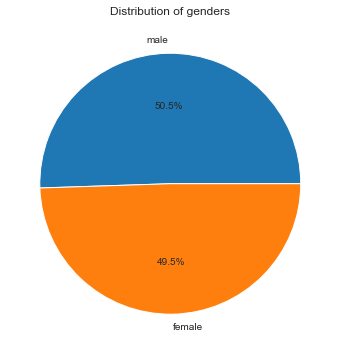

In [6]:
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%')
plt.title("Distribution of genders")
plt.show()

In [7]:
region_count = df['region'].value_counts()
smoker_count = df['smoker'].value_counts()


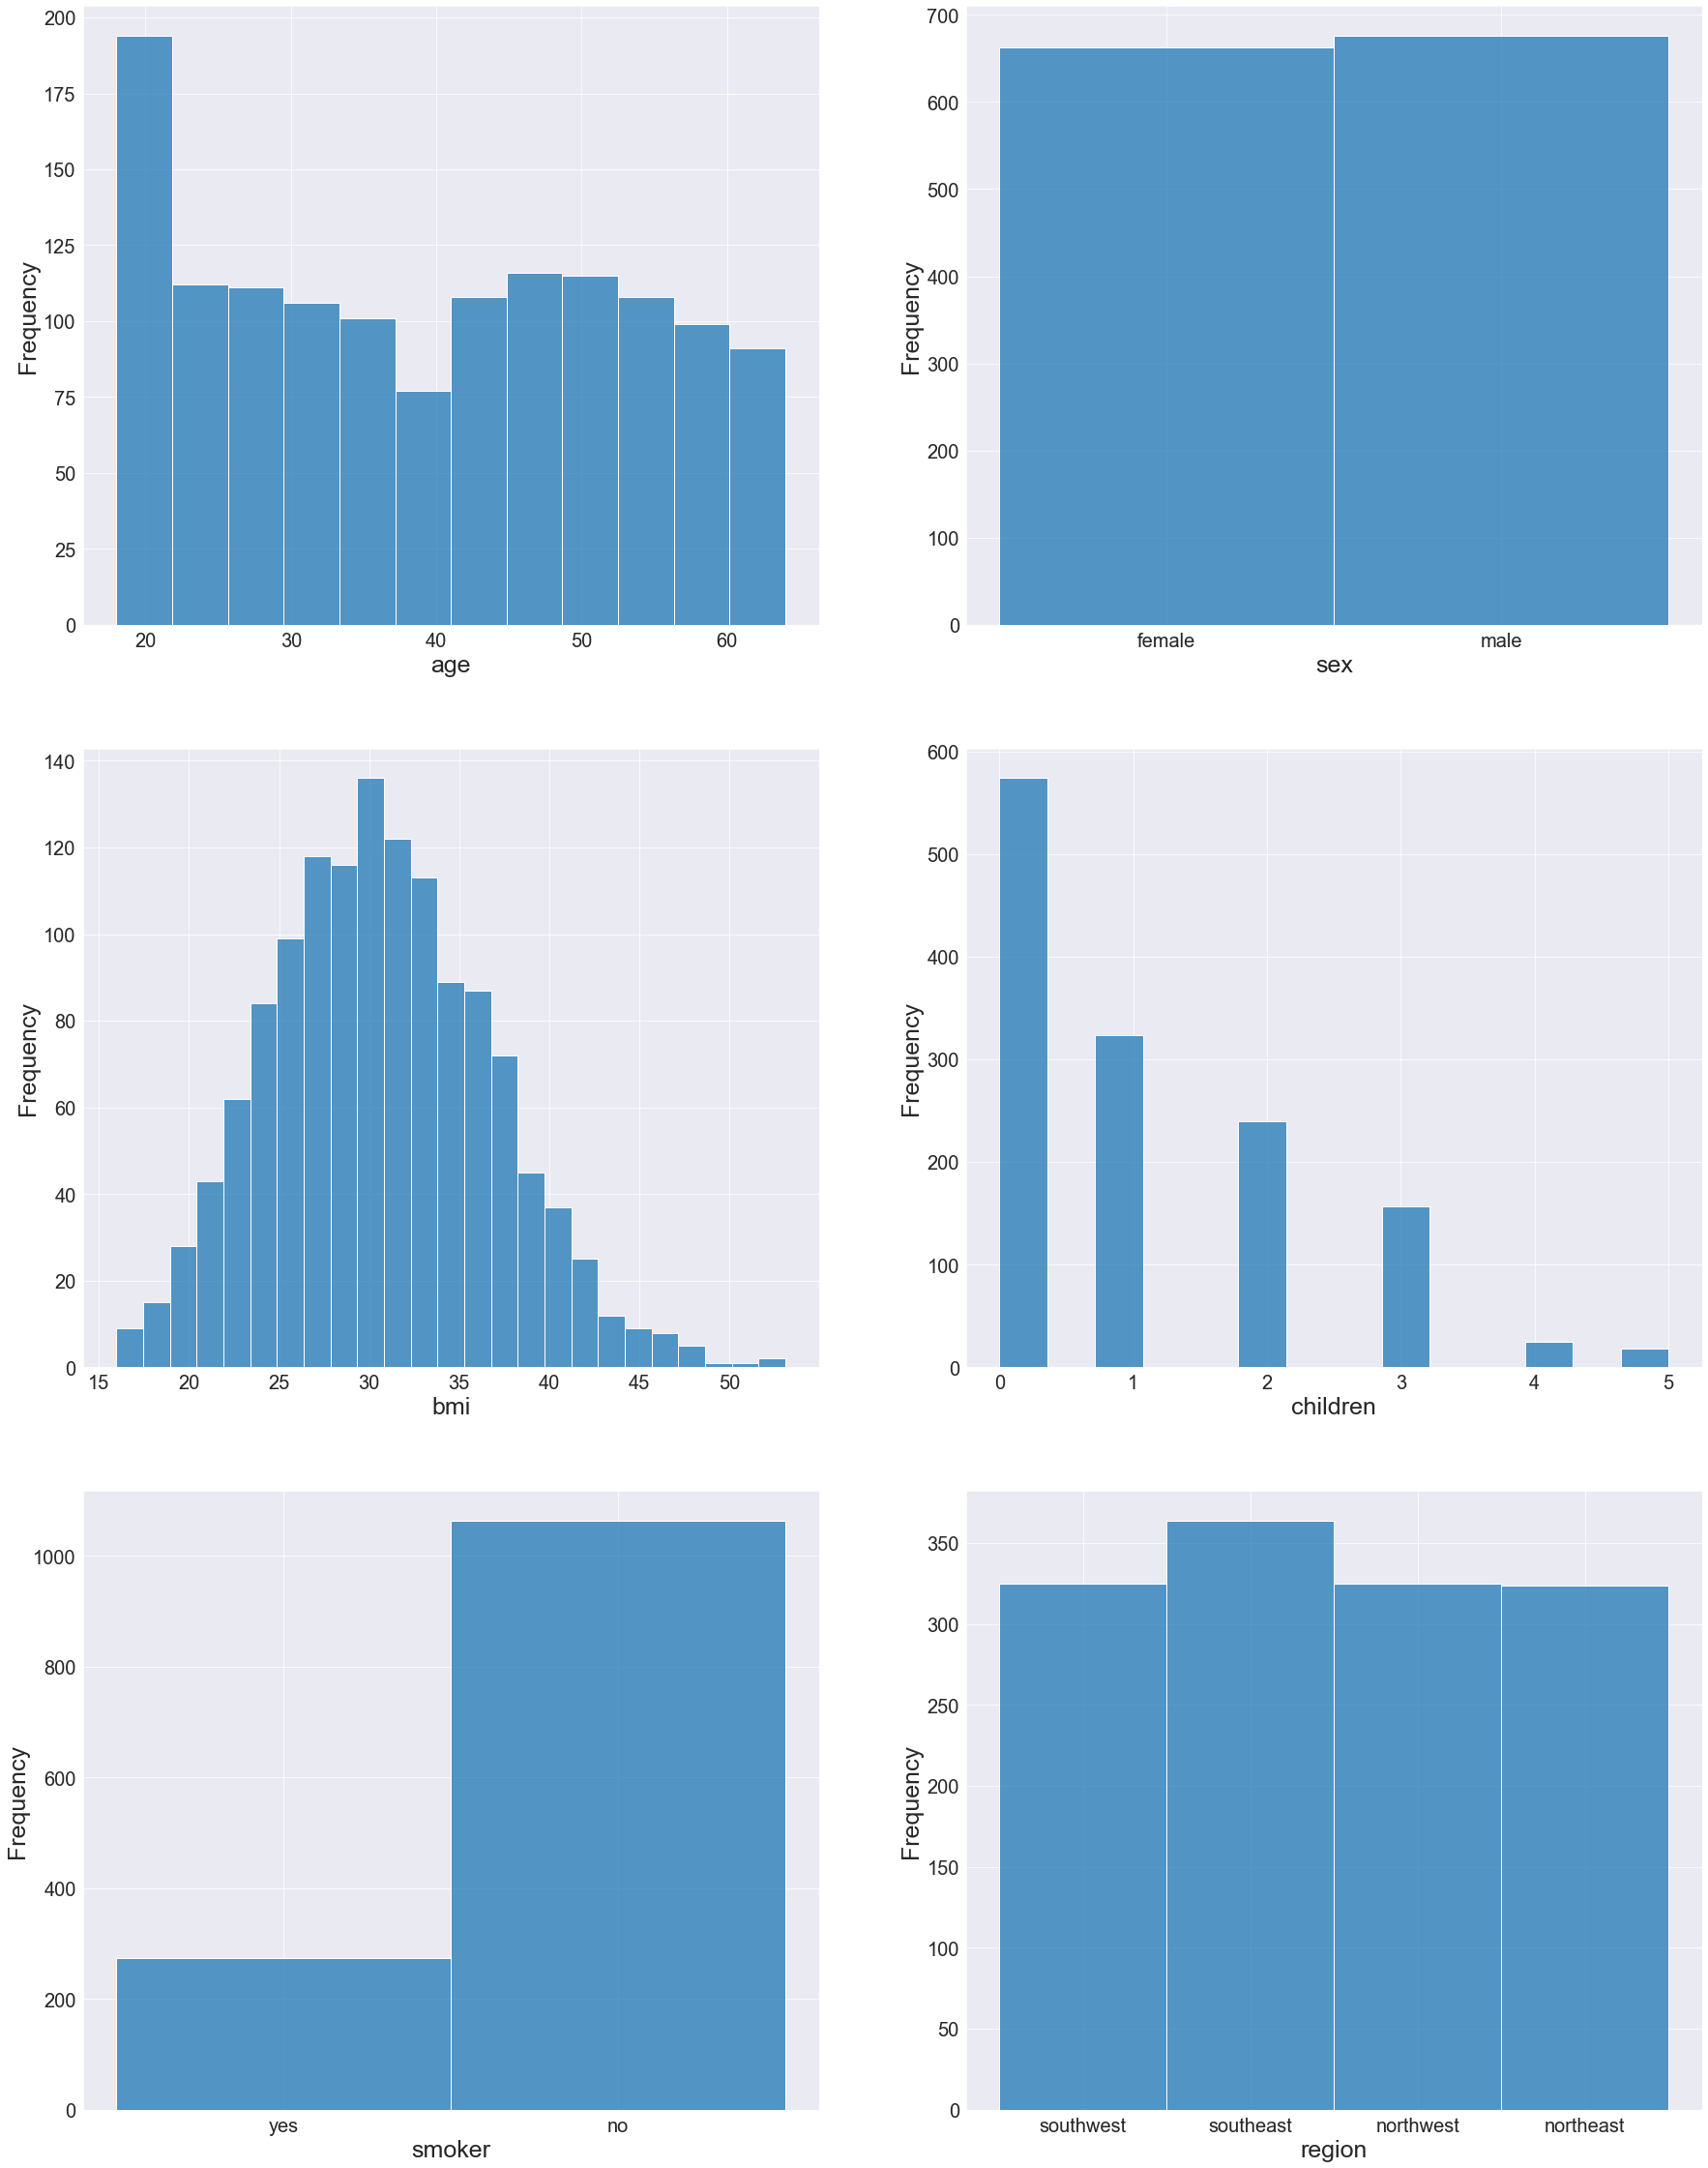

In [8]:
fig, ax = plt.subplots(3,2,figsize=(30,40))
ax=ax.flatten()
for index, column in enumerate(df.columns[:-1]):
    
  #  row = index // 3   # Determine the row number
   # col = index % 3    # Determine the column number
    
    sns.histplot(data=df, x=df[column], ax=ax[index])
    # Set title with font size
    #ax[index].set_title(column, fontsize=30)
    
    # Optionally set x and y labels with font size 
    ax[index].set_xlabel(column, fontsize=25)
    ax[index].set_ylabel('Frequency', fontsize=25)
    
    ax[index].tick_params(axis='x', labelsize=20)
    ax[index].tick_params(axis='y', labelsize=20)
   


plt.show()


Interpretation: Age is uniform, except for ages between 20-30 which have double the amount. Most insurance targets young customers as older may require more serious treatments for age related issues.
bmi follows a gaussian uniform of around 30. insurance policy for overweight or underweight require more expensive procedures so the target is for healthy people 
Most insurance policies offer for 0-1 children , getting more exensive as more children come into pic. (Not child friendly)
It's mostly for non smokers


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

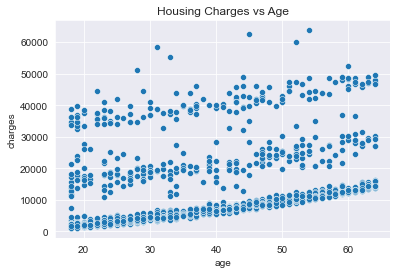

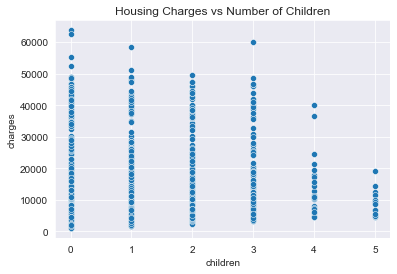

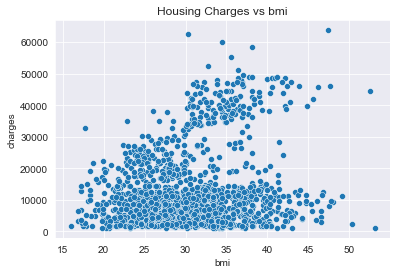

In [10]:
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Housing Charges vs Age')
plt.show()

sns.scatterplot(x='children', y='charges', data=df)
plt.title('Housing Charges vs Number of Children')
plt.show()

sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Housing Charges vs bmi')
plt.show()

#Interpretation
#Age and bmi generally has a positive correlation with charges while children does not
#have any significant relationship with charges

In [11]:
df['charges'].min()

1121.8739

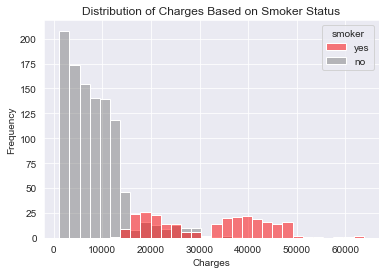

In [15]:
custom_palette = {'yes': 'red', 'no': 'grey'}

#sns.histplot(data=df, x=df['charges'], hue=df['smoker'])
sns.histplot(data=df, x='charges', hue='smoker', palette=custom_palette)

# Adding labels and title for better visualization
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges Based on Smoker Status')
plt.show()


In [16]:
# Group by 'smoker' and calculate the median for 'charges'
median_charges = df.groupby('smoker')['charges'].median()

# Display the median charges for smokers and non-smokers
print(median_charges)


smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64


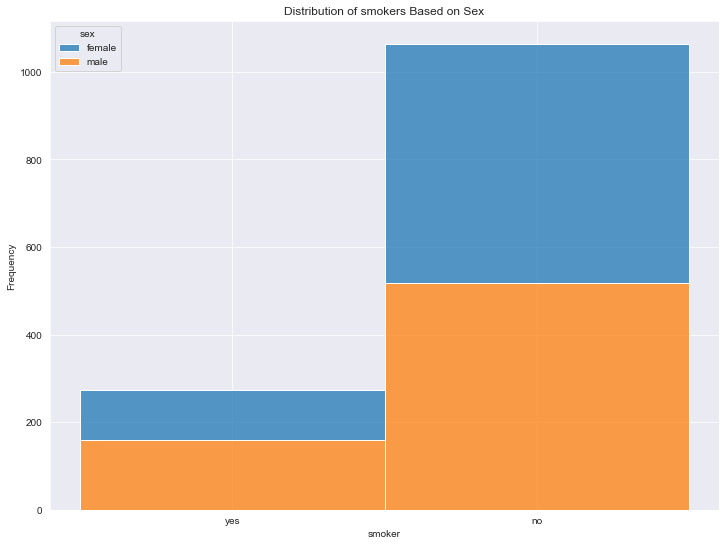

In [43]:
plt.figure(figsize=(12,9))
#sns.histplot(data=df, x=df['charges'], hue=df['smoker'])
sns.histplot(data=df, x='smoker', hue='sex',multiple='stack')

# Adding labels and title for better visualization
plt.xlabel('smoker')
plt.ylabel('Frequency')
plt.title('Distribution of smokers Based on Sex')
plt.show()


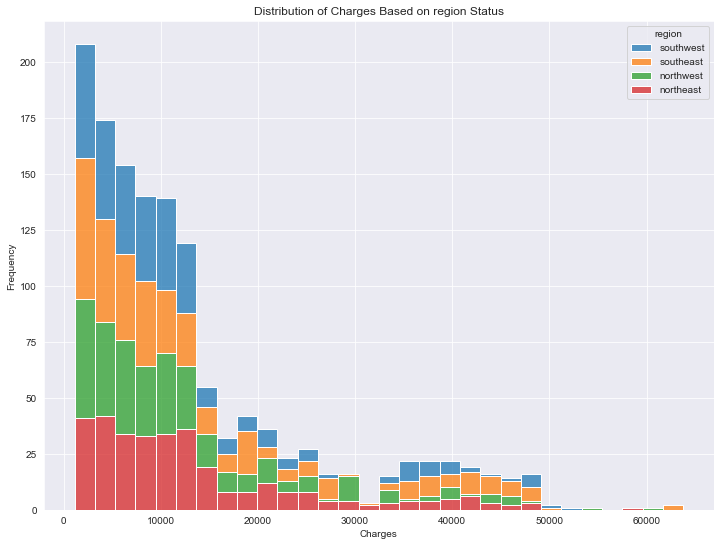

In [36]:
#custom_palette = {'male': 'red', 'female': 'blue'}
plt.figure(figsize=(12,9))
#sns.histplot(data=df, x=df['charges'], hue=df['smoker'])
sns.histplot(data=df, x='charges', hue='region',multiple='stack')#, palette=custom_palette)

# Adding labels and title for better visualization
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges Based on region Status')
plt.show()


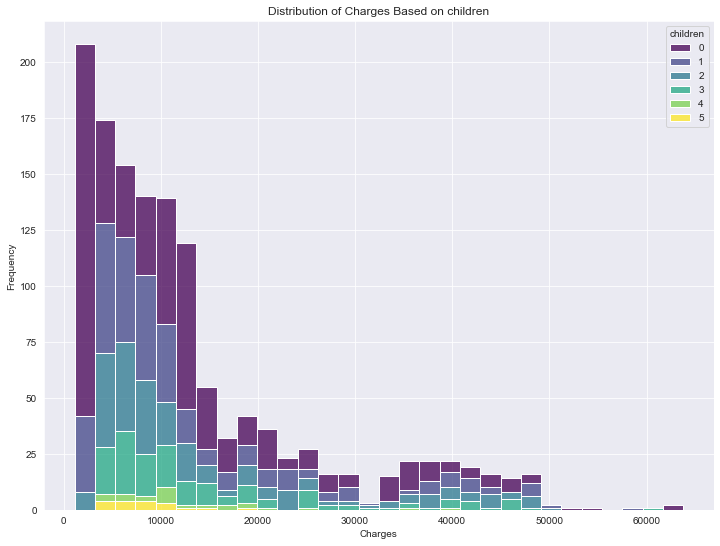

In [45]:
plt.figure(figsize=(12,9))
sns.histplot(data=df, x='charges', hue='children',multiple='stack', palette="viridis")

# Adding labels and title for better visualization
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges Based on children')
plt.show()


In [52]:
# Group by 'smoker' and calculate the median for 'charges'
count_charges = df.groupby('children')['charges'].count()

# Display the median charges for smokers and non-smokers
print(count_charges)


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64


<AxesSubplot:xlabel='bmi', ylabel='charges'>

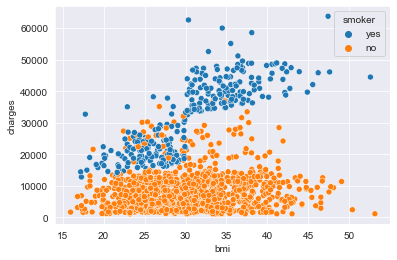

In [19]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)


In [78]:
g = sns.FacetGrid(df, col="region", row="smoker", margin_titles=True)
g.map(sns.histplot, "charges", kde=True)
g.add_legend()
plt.show()


KeyError: 'region'

<AxesSubplot:xlabel='age', ylabel='charges'>

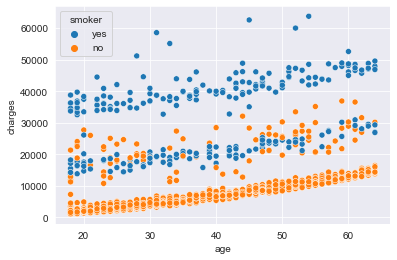

In [54]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)


<AxesSubplot:xlabel='sex', ylabel='charges'>

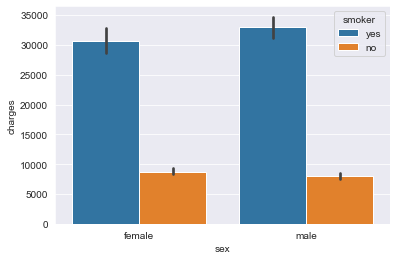

In [55]:
sns.barplot(data = df,x = 'sex',y = 'charges',hue = "smoker")

In [56]:
df.charges.corr(df.age)


0.2990081933306478

In [58]:
df.charges.corr(df.children)


0.06799822684790487

In [59]:
#smoker_values = {'no': 0, 'yes': 1}
#smoker_numeric = df.smoker.map(smoker_values)
#df.charges.corr(smoker_numeric)

0.7872514304984778

In [61]:
gender_values = {'female': 0, 'male': 1}
gender_numeric = df.sex.map(gender_values)
df.charges.corr(gender_numeric)

0.05729206220202533

In [63]:
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 0})

In [65]:
df['smoker_numeric'] = df['smoker'].map({'no': 0, 'yes': 1})

In [66]:
# One-hot encoding the categorical column
df = pd.get_dummies(df, columns=['region'], drop_first=False)

# Getting correlations with the 'charges' column
correlations = df_encoded.corr()['charges']

# Display correlations for the one-hot encoded columns
print(correlations.filter(like='region'))


region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64


In [67]:
df.corr()

,age,bmi,children,charges,sex_numeric,smoker_numeric,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_numeric,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_numeric,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

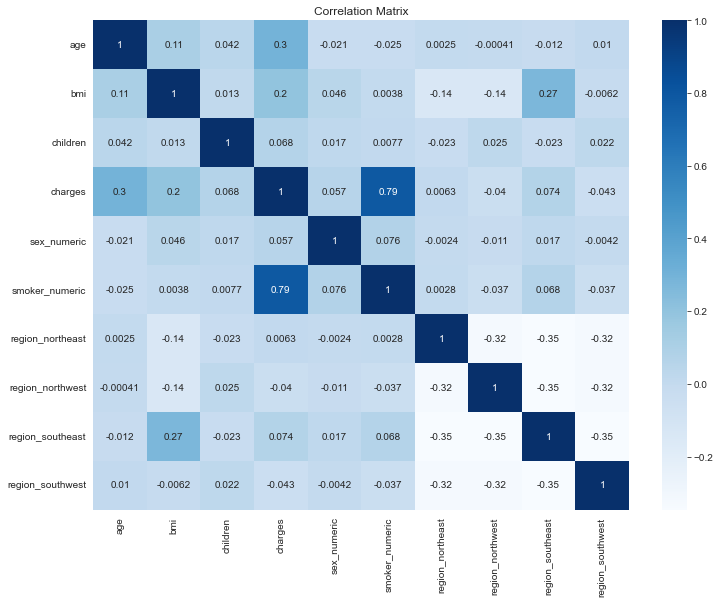

In [69]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

In [ ]:
#from the corr above, remove the features which are unnecessary


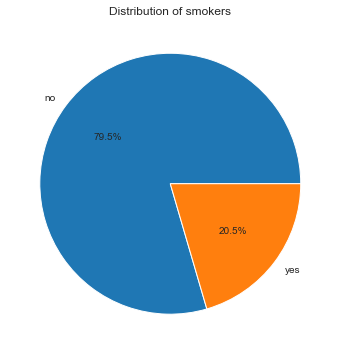

In [76]:
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plt.pie(smoker_count,labels=smoker_count.index,autopct='%1.1f%%')
plt.title("Distribution of smokers")
plt.show()

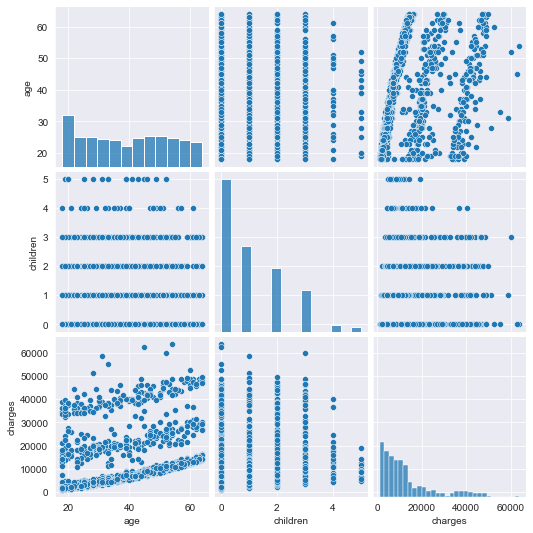

In [79]:
sns.pairplot(df, vars=['age', 'children', 'charges'])
plt.show()


In [80]:
non_smoker_df = df[df['smoker'] == 'no']


In [82]:
#y = b + wx 
#where y is predicted charges
#b is intercept
#w is the weight of the coef
#x is the independent var

model = LinearRegression()
x = non_smoker_df[['age']] # x must be 2d, hence passing df instead of col
y = non_smoker_df.charges
print('x.shape :', x.shape)
print('y.shape :', y.shape)

x.shape : (1064, 1)
y.shape : (1064,)


In [84]:
model.fit(x,y)
predictions = model.predict(x)
r2 = r2_score(y, predictions)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R² score: {r2}")
# Calculate Residuals
residuals = y - predictions

# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

#use df to make the results nicer

Intercept: -2091.4205565650827
Coefficients: [267.24891283]
R² score: 0.3943171632425906
Mean Squared Error: 21738960.02391763


In [85]:
rmse = np.sqrt(mse)
rmse

4662.505766636395

In [86]:
smoker_df = df[df['smoker'] == 'yes']
#y = b + wx 
#where y is predicted charges
#b is intercept
#w is the weight of the coef
#x is the independent var

model = LinearRegression()
x = smoker_df[['age']] # x must be 2d, hence passing df instead of col
y = smoker_df.charges
print('x.shape :', x.shape)
print('y.shape :', y.shape)
model.fit(x,y)
predictions = model.predict(x)
r2 = r2_score(y, predictions)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R² score: {r2}")
# Calculate Residuals
residuals = y - predictions

# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")



x.shape : (274, 1)
y.shape : (274,)
Intercept: 20294.128126915966
Coefficients: [305.23760211]
R² score: 0.13558924096084068
Mean Squared Error: 114725592.72306103
Root Mean Squared Error: 10711.00334810241


In [87]:
# Create inputs and targets
x, y = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression()

print('x.shape :', x.shape)
print('y.shape :', y.shape)
model.fit(x,y)
predictions = model.predict(x)
r2 = r2_score(y, predictions)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R² score: {r2}")
# Calculate Residuals
residuals = y - predictions

# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

x.shape : (1064, 3)
y.shape : (1064,)
Intercept: -2809.2976032235892
Coefficients: [265.2938443    5.27956313 580.65965053]
R² score: 0.408274740172451
Mean Squared Error: 21237999.474113382
Root Mean Squared Error: 4608.470405038247


In [89]:
#for all customers
x, y = df[['age', 'bmi', 'children']], df['charges']
model = LinearRegression()

model.fit(x,y)
predictions = model.predict(x)
r2 = r2_score(y, predictions)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R² score: {r2}")
# Calculate Residuals
residuals = y - predictions
# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Intercept: -6916.243347787033
Coefficients: [239.99447429 332.0833645  542.86465225]
R² score: 0.12009819576246927
Mean Squared Error: 128943244.63563198
Root Mean Squared Error: 11355.317901125973


In [90]:
df.head()

,age,sex,bmi,children,smoker,charges,sex_numeric,smoker_numeric,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0,1,0,0


In [91]:
x, y = df[['age', 'bmi', 'children', 'smoker_numeric', 'sex_numeric']], df['charges']

# Create and train the model
model = LinearRegression()

model.fit(x,y)
predictions = model.predict(x)
r2 = r2_score(y, predictions)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R² score: {r2}")
# Calculate Residuals
residuals = y - predictions
# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Intercept: -12052.46198566473
Coefficients: [  257.73498767   322.36421449   474.41112061 23823.39253065
  -128.63985357]
R² score: 0.7497225098709179
Mean Squared Error: 36676355.794577315
Root Mean Squared Error: 6056.100708754546


In [93]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_numeric', 'sex_numeric', 'region_northeast', 'region_northwest', 
              'region_southeast', 'region_southwest']
x, y = df[input_cols], df['charges']

# Create and train the model
model = LinearRegression().fit(x, y)

# Generate predictions
predictions = model.predict(x)

r2 = r2_score(y, predictions)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R² score: {r2}")
# Calculate Residuals
residuals = y - predictions
# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Intercept: -12525.547811195429
Coefficients: [  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
R² score: 0.7509130345985207
Mean Squared Error: 36501893.00741544
Root Mean Squared Error: 6041.6796511744515


In [98]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_numeric', 'sex_numeric', 'region_northeast', 'region_northwest', 
              'region_southeast', 'region_southwest']
x, y = smoker_df[input_cols], smoker_df['charges']

# Create and train the model
model_smoker = LinearRegression().fit(x, y)

# Generate predictions
predictions = model_smoker.predict(x)

r2 = r2_score(y, predictions)
print(f"Intercept: {model_smoker.intercept_}")
print(f"Coefficients: {model_smoker.coef_}")
print(f"R² score: {r2}")
# Calculate Residuals
residuals = y - predictions
# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Intercept: -23426.354338758963
Coefficients: [ 2.67404386e+02  1.47554563e+03  1.82736551e+02  1.13686838e-13
 -3.88121649e+02  7.54585021e+02  6.48669959e+01 -1.13815350e+03
  3.18701480e+02]
R² score: 0.7579019819278512
Mean Squared Error: 32131528.130537026
Root Mean Squared Error: 5668.4678821121515


In [99]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_numeric', 'sex_numeric', 'region_northeast', 'region_northwest', 
              'region_southeast', 'region_southwest']
x, y = non_smoker_df[input_cols], non_smoker_df['charges']

# Create and train the model
model_non_smoker = LinearRegression().fit(x, y)

# Generate predictions
predictions = model_non_smoker.predict(x)

r2 = r2_score(y, predictions)
print(f"Intercept: {model_non_smoker.intercept_}")
print(f"Coefficients: {model_non_smoker.coef_}")
print(f"R² score: {r2}")
# Calculate Residuals
residuals = y - predictions
# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Intercept: -2940.7471545562603
Coefficients: [ 2.64481438e+02  1.89804618e+01  5.87458257e+02  1.70530257e-13
 -5.25970487e+02  7.33683019e+02  1.85554256e+02 -2.58365372e+02
 -6.60871903e+02]
R² score: 0.41732934107851793
Mean Squared Error: 20913014.85314689
Root Mean Squared Error: 4573.074988795492


In [102]:
input_cols = ['age', 'bmi', 'children', 'smoker_numeric', 'sex_numeric', 'region_northeast', 'region_northwest', 
              'region_southeast', 'region_southwest']
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 'intercept'),
    'weight': np.append(model.coef_ , model.intercept_),
    'weight_smoker' : np.append(model_smoker.coef_ , model_smoker.intercept_),
    'weight_non_smoker' : np.append(model_non_smoker.coef_ , model_non_smoker.intercept_)

})

# keep only 3 digits after decimal
weights_df


#pd.DataFrame(zip(X.columns, model.coef_))


,feature,weight,weight_smoker,weight_non_smoker
0,age,256.856353,2.674044e+02,2.644814e+02
1,bmi,339.193454,1.475546e+03,1.898046e+01
2,children,475.500545,1.827366e+02,5.874583e+02
3,smoker_numeric,23848.534542,1.136868e-13,1.705303e-13
4,sex_numeric,-131.314359,-3.881216e+02,-5.259705e+02
5,region_northeast,587.009235,7.545850e+02,7.336830e+02
6,region_northwest,234.045336,6.486700e+01,1.855543e+02
7,region_southeast,-448.012814,-1.138153e+03,-2.583654e+02
8,region_southwest,-373.041756,3.187015e+02,-6.608719e+02
9,intercept,-12525.547811,-2.342635e+04,-2.940747e+03


In [108]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df[numeric_cols])
scaled_inputs = scaler.transform(df[numeric_cols])
#scaled_inputs gives np array
cat_cols = ['smoker_numeric', 'sex_numeric', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
categorical_data = df[cat_cols].values

In [109]:
type(categorical_data)

numpy.ndarray

In [110]:
#scaled model
x = np.concatenate((scaled_inputs, categorical_data), axis=1)
y = df.charges



# Create and train the model
model_scaled = LinearRegression().fit(x, y)

# Generate predictions
predictions = model_scaled.predict(x)

r2 = r2_score(y, predictions)
print(f"Intercept: {model_scaled.intercept_}")
print(f"Coefficients: {model_scaled.coef_}")
print(f"R² score: {r2}")
# Calculate Residuals
residuals = y - predictions
# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Intercept: 8466.483215411838
Coefficients: [ 3607.47273619  2067.69196584   572.99820995 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
R² score: 0.7509130345985207
Mean Squared Error: 36501893.00741544
Root Mean Squared Error: 6041.6796511744515


In [113]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 'intercept'),
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})
weights_df.sort_values('weight', ascending=True)

,feature,weight
7,region_southeast,-448.012814
8,region_southwest,-373.041756
4,sex_numeric,-131.314359
6,region_northwest,234.045336
2,children,572.998210
5,region_northeast,587.009235
1,bmi,2067.691966
0,age,3607.472736
9,intercept,8466.483215
3,smoker_numeric,23848.534542


In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [119]:
# Create and train the model
model = LinearRegression().fit(x_train, y_train)

# Generate predictions
predictions_test = model.predict(x_test)

# Generate predictions
predictions_train = model.predict(x_train)


r2_test = r2_score(y_test, predictions_test)
print(f"Intercept: {model_scaled.intercept_}")
print(f"Coefficients: {model_scaled.coef_}")
print(f"R² score test: {r2_test}")
# Calculate Residuals
residuals_test = y_test - predictions_test
# Mean Squared Error
mse_test = mean_squared_error(y_test, predictions_test)
print(f"Mean Squared Error of test: {mse_test}")
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error of test: {rmse_test}")


r2_train = r2_score(y_train, predictions_train)
print(f"Intercept: {model_scaled.intercept_}")
print(f"Coefficients: {model_scaled.coef_}")
print(f"R² score train: {r2_train}")
# Calculate Residuals
residuals_train = y_train - predictions_train
# Mean Squared Error
mse_train = mean_squared_error(y_train, predictions_train)
print(f"Mean Squared Error of train: {mse_train}")
rmse_train = np.sqrt(mse_train)
print(f"Root Mean Squared Error of train: {rmse_train}")

Intercept: 8466.483215411838
Coefficients: [ 3607.47273619  2067.69196584   572.99820995 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
R² score test: 0.7999876970680435
Mean Squared Error of test: 31827950.229523823
Root Mean Squared Error of test: 5641.626558850189
Intercept: 8466.483215411838
Coefficients: [ 3607.47273619  2067.69196584   572.99820995 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
R² score train: 0.7370262574551634
Mean Squared Error of train: 37701533.128629126
Root Mean Squared Error of train: 6140.157418880165


ValueError: x and y must have same first dimension, but have shapes (268,) and (1338,)

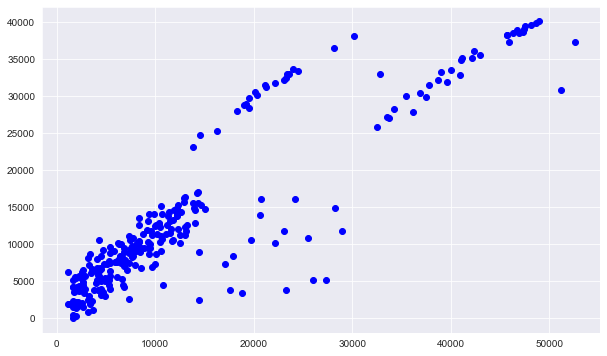

In [127]:
#plot graph of actual and predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_test, color='blue', label='Predicted vs Actual (Test)')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit Line')
plt.plot(y_test, y_.charges, color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.show()


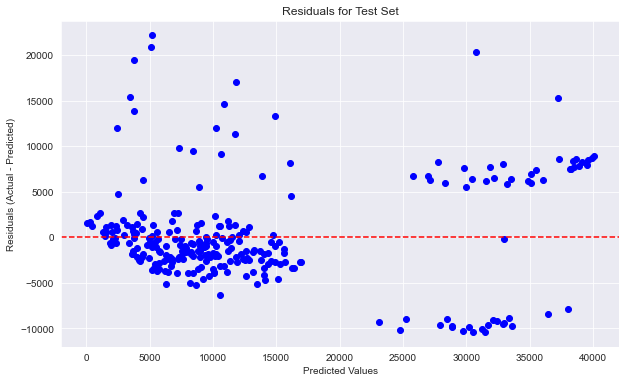

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_test, residuals_test, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals for Test Set')
plt.show()

In [124]:
#pd.DataFrame(zip(x.columns, model.coef_))


In [ ]:
# have all the models build and plot the errors
# also make a table of mse, r^2 for all models built

In [ ]:
sns.boxplot(data = df_without_outlier, x='charges')


In [75]:
#Detecting Outliers
#Using Box plot, but can also be done using z score (data point-mean/std) or IQR 
#outliers in IQR: Q1 - 1.5IQR and Q3 + 1.5*IQR where IQR can be found by Q3 - Q1
#fig,ax = plt.subplots(3,1,figsize=(15,14))
#ax=ax.flatten()
#df_categorical=df.drop(columns=['age','bmi','children'])
#for i, col in enumerate(df_categorical.columns[:-1]):
 #   sns.boxplot(x=df[col],y=df_categorical['charges'],ax=ax[i])
    #plt.title(column)


In [ ]:
sns.boxplot(data = df, x='charges')


In [ ]:
df['charges']= sorted(df['charges'])
#Q1 = np.percentile(df['charges'], 25)
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound =(1.5 * IQR) -  Q1 
upper_bound= Q3 + (1.5 * IQR)


In [ ]:
df_without_outlier = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]
df_without_outlier

In [ ]:
df['charges'].min()

In [ ]:
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plt.pie(region_count,labels=region_count.index,autopct='%1.1f%%')
plt.title("Distribution of regions")
plt.show()

In [ ]:
#Detecting Outliers
#Using Box plot, but can also be done using z score (data point-mean/std) or IQR 
#outliers in IQR: Q1 - 1.5IQR and Q3 + 1.5*IQR where IQR can be found by Q3 - Q1
fig,ax = plt.subplots(3,1,figsize=(15,14))
ax=ax.flatten()
df_categorical=df_without_outlier.drop(columns=['age','bmi','children'])
for i, col in enumerate(df_categorical.columns[:-1]):
    sns.boxplot(x=df[col],y=df_categorical['charges'],ax=ax[i])
    #plt.title(column)


In [ ]:
#Feature correlation
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

#Interpretation: Children has no correlation to charges, bmi or age

In [ ]:
#violin plot similar to box and whisker but provide more info on distribution of data.
#violin provides density of data at a given y value
#KDE: The main shape of the violin plot,which represents the distribution of the data.
#Central Vertical Line: Represents the range from the minimum to the maximum of the data.
#Horizontal Line or Point in the Middle: This usually represents the median of the data.
#Box in the Middle: Represents the interquartile range (IQR) with the median marked by a line or point.
sns.violinplot(x='region', y='charges', data=df)
plt.title('Housing Charges by Region')
plt.show()
#Interpretation
#Width of the Violin Plot (Fatness)
''''
The width of the violin plot at any given value represents the density of data points at that value.
A fatter or wider section indicates that a larger number of observations (higher density) fall within that range of the data. This means that many data points are concentrated in that area.
In this case, there are a lot of south west people who are paying similar charges in that category.
2. Height of the Violin Plot
Height of the Violin Plot:
The height of the violin plot corresponds to the range of the data, from the minimum to the maximum values.
A taller violin indicates a larger range of values within that category.
Shorter Violin Plot: A violin plot that is shorter indicates that the data in that category has a more limited range—
it doesn’t extend as far in either direction (lower variability).
Example: In this case, southwest has a shorter violin plot compared to another, meaning that housing charges are less variable
and more consistent.'''

In [ ]:
def one_hot_encoding(df,col_names: list):
    #Encoding
    for col_name in col_names:

        distinct_val = np.unique(df[col_name])
        n_col = len(distinct_val)  # Get the number of columns

        # Create a mapping from each unique value to its index
        val_to_index = {val: idx for idx, val in enumerate(distinct_val)}

        final_arr = []
        for i in df[col_name]:
            # Use the mapping to find the correct index for the '1'
            index = val_to_index[i]
            new_arr = [1 if j == index else 0 for j in range(n_col)]
            final_arr.append(new_arr)

        # Convert the list of encoded rows into a DataFrame
        encoded_df = pd.DataFrame(final_arr, columns=[f'{col_name}_{val}' for val in distinct_val])

        # Concatenate the original DataFrame with the encoded DataFrame (add columns)
        df = pd.concat([df, encoded_df], axis=1)

        # Drop the original 'sex' column if no longer needed
        df = df.drop(columns=[col_name], axis=1)
    
    return df

    

In [ ]:
df = one_hot_encoding(df,['sex','smoker','region'])

In [ ]:
df

In [ ]:
sns.histplot(data=df, x='children')

In [ ]:
df['charges'] = np.log(df['charges'])


In [ ]:
#from math import log
#df['charges_log2'] = df['charges'].apply(lambda x: log(x))

In [ ]:
df.head(5)

In [ ]:
'''def feature_scaling(data):
    # Standardization
    mean = np.mean(data, axis=0) 
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    
    # Min-Max Normalization
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    normalized_data = (data - min_val) / (max_val - min_val)
    
    return np.round(standardized_data,4).tolist(), np.round(normalized_data,4).tolist()'''

In [ ]:
def standardize_selected_columns(df, columns_to_standardize):
    # Standardize only the specified columns
    standardized_cols = (df[columns_to_standardize] - df[columns_to_standardize].mean()) / df[columns_to_standardize].std()
    
    # Concatenate the standardized columns with the rest of the DataFrame (excluding the original columns)
    df_rest = df.drop(columns_to_standardize, axis=1)
    df_final = pd.concat([standardized_cols,df_rest], axis=1)
    
    return df_final

In [ ]:
#col = ['age','bmi','charges']
#df_std = standardize_selected_columns(df, col)

In [ ]:
#df_std.columns

In [ ]:
#Dividing into dependent and independent variables
#X = df[['age','bmi','children','sex_female','sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
#                    'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

X = df[['bmi']]



In [ ]:
X.head()

In [ ]:
# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''
The key difference between fit_transform on X_train and transform on X_test is to avoid data leakage

fit_transform only on X_train?
Fitting means the scaler computes the mean and standard deviation of the training data.Transforming then uses these 
computed values to scale the training data so that each feature in X_train has a mean of 0 and a standard deviation of 1.

Why is this important?

You want the model to learn from the distribution of the training data, including its statistical properties (like mean and standard deviation).
By doing this, you're ensuring that the model is learning from data that is consistently scaled.
Why only transform on X_test?
You transform X_test using the mean and standard deviation from the training data. 
we want to "fit" the test data because it represents unseen data for the model.

Avoid data leakage: If you were to fit the scaler on the test data, you'd be introducing information from the test set (which is supposed to be unseen) into the training process. This would give your model an unrealistic advantage, leading to overfitting.
Realistic evaluation: By using the same scaling parameters (from the training data) on the test set, you're simulating how the model would behave in a real-world scenario where it only sees unseen data for predictions.
'''

In [ ]:
y_train.shape

In [ ]:
selector = SelectKBest(score_func=f_regression, k=3)  # You can adjust k as needed
X_train_selected  = selector.fit_transform(X_train_scaled, y_train)
# Get the selected feature indices
selected_features = selector.get_support(indices=True)

print("Selected feature indices:", selected_features)


#X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]



In [ ]:
X_train.head()

In [ ]:

#Linear Reg model
model = LinearRegression()

model.fit(X_train, y_train)

#xfit = np.linspace(0, 10, 1000)
y_pred = model.predict(X_test)

#plt.scatter(x, y)
#plt.plot(xfit, yfit)

r2 = r2_score(y_test, y_pred)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R² score: {r2}")
# Calculate Residuals
residuals = y_test - y_pred

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:

'''
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()
'''
'''R² score: -0.02327812888224212
The R² score (coefficient of determination) is a measure of how well the model explains the variance in the target variable.
An R² score close to 1 means a perfect fit, while an R² of 0 means that the model does not explain any of the variance in the target variable.
In this case, an R² score of -0.023 means the model is performing very poorly, even worse than a horizontal line (which would give an R² of 0).
A negative R² indicates that the model is not explaining the variance at all and is possibly overfitting or underfitting the data.
This suggests that your current set of features or the linear model itself is not capturing the relationship between the independent variables and the target variable well.'''

In [ ]:
'''from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for more detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))'''

In [ ]:
# Calculate Residuals
residuals = y_test - y_pred

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')

In [ ]:
'''from scipy.stats import pearsonr
# Apply the pearsonr()
corr, _ = pearsonr(X_train, y_train)
print('Pearsons correlation: %.3f' % corr)'''

In [ ]:
'''from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest with chi2
select_k_best = SelectKBest(score_func=chi2, k=2)
X_train_k_best = select_k_best.fit_transform(X_train, y_train)

print("Selected features:", X_train.columns[select_k_best.get_support()])'''

In [ ]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² score: {r2}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Plotting
'''plt.figure(figsize=(10, 6))
plt.scatter(X_test_selected, y_test, color='blue', label='Actual data')
plt.plot(X_test_selected, y_pred, color='red', label='Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression of Degree 3')
plt.legend()
plt.show()'''

In [ ]:
# Ridge and lasso
from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train_selected,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train_selected, y_train)
test_score_ridge = ridgeReg.score(X_test_selected, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


In [ ]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train_selected,y_train)
train_score_ls =lasso.score(X_train_selected,y_train)
test_score_ls =lasso.score(X_test_selected,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


In [ ]:
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = "bar")


In [ ]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train_selected, y_train)


#score
print(lasso_cv.score(X_train_selected, y_train))
print(lasso_cv.score(X_test_selected, y_test))


In [ ]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()


In [ ]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train_selected, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train_selected, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test_selected, y_test)))